# Введение в обработку текста на естественном языке

## Задачи для совместного разбора

In [1156]:
# !pip install pymorphy2

In [1157]:
# import nltk

# nltk.download("punkt")

1. Считайте слова из файла `litw-win.txt` и запишите их в список `words`. При помощи расстояния Левенштейна иправьте опечатку в слове "велечайшим".

In [1158]:
from nltk import edit_distance

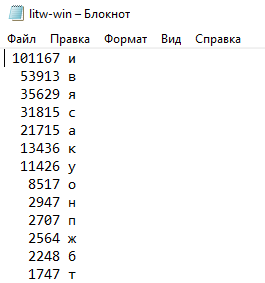

In [1159]:
# считаем файл со словами
# в начале файла идут пробелы, потом какие-то числа (нам они не нужны), потом сами слова

# with open("litw-win.txt", "r", encoding="utf-8") as fp:
#     # делим строки по пробелам и берем последний элемент
#     words = [line.split()[-1] for line in fp]
    
# это как раз тот случай, когда файл не в utf-8, поэтому ничего не работает
# попробуем другую кодировку - windows-1251

In [1160]:
with open("litw-win.txt", "r", encoding="windows-1251") as fp:
    # делим строки по пробелам и берем последний элемент
    words = [line.split()[-1] for line in fp]
# теперь сработало

In [1161]:
words

['и',
 'в',
 'я',
 'с',
 'а',
 'к',
 'у',
 'о',
 'н',
 'п',
 'ж',
 'б',
 'т',
 'д',
 'м',
 'ч',
 'з',
 'г',
 'е',
 'р',
 'э',
 'л',
 'х',
 'ш',
 'ф',
 'ц',
 'щ',
 'й',
 'ю',
 'ы',
 'ъ',
 'ь',
 'не',
 'на',
 'он',
 'то',
 'но',
 'же',
 'вы',
 'по',
 'да',
 'за',
 'бы',
 'ты',
 'от',
 'из',
 'ее',
 'до',
 'ну',
 'ни',
 'ли',
 'уж',
 'во',
 'их',
 'мы',
 'со',
 'ей',
 'об',
 'ко',
 'ах',
 'им',
 'ка',
 'та',
 'пр',
 'те',
 'чт',
 'ту',
 'го',
 'де',
 'вс',
 'эт',
 'мо',
 'ра',
 'ст',
 'ха',
 'хе',
 'ум',
 'се',
 'эх',
 'гм',
 'ме',
 'св',
 'ль',
 'ег',
 'пе',
 'ва',
 'са',
 'ве',
 'ох',
 'бо',
 'хо',
 'че',
 'сл',
 'од',
 'бе',
 'мн',
 'ай',
 'ею',
 'ос',
 'ск',
 'ви',
 'ми',
 'ма',
 'сп',
 'ба',
 'ес',
 'бу',
 'гл',
 'що',
 'эй',
 'ем',
 'кр',
 'см',
 'др',
 'лю',
 'па',
 'ро',
 'зн',
 'ле',
 'як',
 'тр',
 'жи',
 'ел',
 'ус',
 'фу',
 'дв',
 'ру',
 'ал',
 'ой',
 'си',
 'ду',
 'вз',
 'ещ',
 'хи',
 'чи',
 'вд',
 'ил',
 'ух',
 'ча',
 'гр',
 'пи',
 'бл',
 'ре',
 'су',
 'ге',
 'ку',
 'оп',
 'ж

In [1162]:
words[10000:10005]

['танцы', 'трубу', 'тулуп', 'турки', 'туфли']

In [1163]:
# для вычисления расстояния Левенштейна есть много разных функций
# мы можем воспользоваться nltk, с которым знакомились в прошлый раз

# расстояние Левенштейна измеряет близость между строками; чем меньше полученное значение,
# тем больше похожи две строки друг на друга
# "похожесть" измеряется в количестве операций вставки, удаления и замены символов, которые
# надо сделать, чтобы одну строку свести к другой

In [1164]:
edit_distance("Вы справитесь с домашкой", "Вы не справитесь с домашкой")
# вернулось число 3, потому что надо после слова "Вы" добавить 3 символа: 
# пробел, "н" и "е", и тогда две строки станут одинаковыми

3

In [1165]:
%%time

# один из вариантов использования расстояния - исправление ошибок
# берем слово с ошибкой
word = "велечайшим"
# у нас есть список words, в котором, мы точно знаем, содержатся слова без ошибок
# в списке слов words ищем слово, которое как можно ближе к word

# можно воспользоваться встроенным min
min(
    words,  # ищи минимум по строкам из words
    key=lambda w: edit_distance(
        word, w
    ),  # минимум в смысле расстояния от конкретного слова w до слова word
)

Wall time: 18 s


'величайшим'

In [1166]:
# вычисление расстояние Левенштейна - в общем случае не дешевая операция
# поэтому предыдущая ячейка может занять какое-то время
# на практике лучше добавить каких-нибудь эвристик, чтобы сократить объем вычислений
# если это возможно

2. Разбейте текст из формулировки второго задания на слова. Проведите стемминг и лемматизацию слов.

In [1167]:
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
import pymorphy2

In [1168]:
# для наглядности чуть поменяю формулировку задания

In [1169]:
text = """Разбейте текст из формулировки второго задания на слова. Проведите стемминг и лемматизацию слов в тексте."""

In [1170]:
# разбиваем текст на слова при помощи уже известной нам word_tokenize

words = word_tokenize(text)
words[:5]

['Разбейте', 'текст', 'из', 'формулировки', 'второго']

In [1171]:
# при обработке текстов на многих языках возникает одна и та же проблема:
# если ничего не предпринять, то различные формы слов будут рассматриваться в нашем
# коде, как совершенно разные слова. Например, в words сейчас есть 2 слова: "текст" и "тексте"
# машине неоткуда узнать, что это одно и то же слово, но в разных падежах
# если ничего с этим не сделать, то часто можно столкнуться с тем, что:
# а) алгоритм будет работать хуже (любой, в т.ч. модель ML)
# б) алгоритм будет работать медленнее (т.к. форм слова в русском может быть очень много, размер вашего
# словаря слов может быть просто гигантским)

In [1172]:
# чтобы это победить, есть как минимум 2 варианта: стемминг и лемматизация

# начинаем со стемминга. Стемминг - это процедура "отбрасывания" последних нескольких символов
# слова, которые, по идее, и отвечают на форму. Проблема в том, что заранее вы не знаете,
# сколько символов отбросить
# русскоязычный стеммер есть в том же nltk

# создаем специальный объект-стеммер и указываем,
# что будем работать с русским языком (это важно, т.к. другие языки надо обрабатывать по-другому)
stemmer = SnowballStemmer("russian")
# для каждого слова из words вызываем метод stem у стеммера
{w: stemmer.stem(w) for w in words}

# из плюсов - работает достаточно быстро и позволяет решить нашу проблему
# из минусов - то, что получилось - это уже не слова русского языка

{'Разбейте': 'разб',
 'текст': 'текст',
 'из': 'из',
 'формулировки': 'формулировк',
 'второго': 'втор',
 'задания': 'задан',
 'на': 'на',
 'слова': 'слов',
 '.': '.',
 'Проведите': 'провед',
 'стемминг': 'стемминг',
 'и': 'и',
 'лемматизацию': 'лемматизац',
 'слов': 'слов',
 'в': 'в',
 'тексте': 'текст'}

In [1173]:
# лемматизация - это процедура приведения слова к начальной форме. что такое "начальная форма" -
# зависит от части речи слова (для прилагательных, например, ед.ч именительный пад. мужской род)
# в nltk есть инструменты для лемматизации англоязычных слов
# а для русского языка мы попользуем пакет pymorphy2

In [1174]:
# создаем специальный объект MorphAnalyzer
# важно: его надо создать один раз, и использовать ниже по коду
# не создавайте его в циклах и т.д. - это сильно замедлит работу
morph = pymorphy2.MorphAnalyzer()

In [1175]:
# возьмем первое слово и посмотрим на его примере, как работать с этой штукой
w = words[0]
# передаем слово в morph.parse и смотрим на результат
res = morph.parse(w)
print(res)
# результат - это список объектов Parse. Каждый объект - это специальная структура, которая
# содержит информацию о том, что это за часть речи, какая у него (слова) нормальная форма
# и некоторую другую информацию
# почему список? потому что часто pymorphy не может однозначно определить, что это за часть речи
# поэтому предлагает нам выбор; этот список упорядочен по убыванию "правдоподобности" результата
# т.е. часто имеет смысл смотреть на 0й элемент
opt1 = res[0]

[Parse(word='разбейте', tag=OpencorporaTag('VERB,perf,tran plur,impr,excl'), normal_form='разбить', score=1.0, methods_stack=((DictionaryAnalyzer(), 'разбейте', 646, 14),))]


In [1176]:
# у объектов Parse есть поле normalized, которое вернем нам тоже объект Parse,
# но для нормализованной формы слова
print(opt1.normalized)

# после этого нам останется только вытащить саму строку из объекта
# для этого обратимся к полю word
print(opt1.normalized.word)

Parse(word='разбить', tag=OpencorporaTag('INFN,perf,tran'), normal_form='разбить', score=1.0, methods_stack=((DictionaryAnalyzer(), 'разбить', 646, 0),))
разбить


In [1177]:
# теперь все вместе
morph = pymorphy2.MorphAnalyzer()
{w: morph.parse(w)[0].normalized.word for w in words}
# опять же, решили нужную нам задачу, но теперь результат - это настоящие слова, что может быть хорошо
# для каких-то задач. из минусов - это работает медленнее стемминга

{'Разбейте': 'разбить',
 'текст': 'текст',
 'из': 'из',
 'формулировки': 'формулировка',
 'второго': 'второй',
 'задания': 'задание',
 'на': 'на',
 'слова': 'слово',
 '.': '.',
 'Проведите': 'провести',
 'стемминг': 'стемминг',
 'и': 'и',
 'лемматизацию': 'лемматизация',
 'слов': 'слово',
 'в': 'в',
 'тексте': 'текст'}

3. Преобразуйте предложения из формулировки задания 2 в векторы при помощи `CountVectorizer`. Выведите на экран словарь обученного токенизатора.

In [1178]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import sent_tokenize

In [1179]:
text = """Разбейте текст из формулировки второго задания на слова. Проведите стемминг и лемматизацию слов в тексте."""

In [1180]:
# вы знаете, что модели ML любят числа, не любят буквы
# поэтому почти всегда первый наш шаг - преобразовать строку в числовой вектор
# в этом месте появляется куча разнообразных методов, решающих эту задачу
# здесь мы рассмотрим, наверное, самый простой способ решения этой задачи
# на практике так уже не делают, т.к. есть способы кодирования, которые дают более высокие результаты
# но это требует уметь работать с нейронками, поэтому, надеюсь, вам это расскажут на курсе по ML

# мы вместо сложных нейронок сейчас сделаем следующее: возьмем текст, распилим его на слова, запомним, какие слова в нем есть
# каждое слово занумеруем числами от 0 и создадим вектор для каждого предложения по следующему правилу:
# сколько раз в предложении встретилось слово с номером i, такое число будет стоять в i-й координате вектора
# для данного предложения

In [1181]:
# можно для этих целей воспользоваться готовым решением из sklearn
# считаю, что с sklearn вы уже знакомы из курса ML

# нам нужно самим разбить текст на предложения
sents = sent_tokenize(text)
sents
# потом обучаем объект-векторизатор (в задании ошибка: не токенизатор, а векторизатор)
# в этом месте происходит разбиение на слова, их нумерация и т.д.
cv = CountVectorizer().fit(sents)
# и потом преобразуем строки в векторы при помощи метода transform обученного векторизатора
# transform вернет sparse массив, сделаем его "обычным", вызвав .toarray()
sents_cv = cv.transform(sents).toarray()
sents_cv

array([[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]], dtype=int64)

In [1182]:
# теперь как понять, что это за единички и нолики?
# посмотрим на поле vocabulary_ у векторизатора
cv.vocabulary_

{'разбейте': 6,
 'текст': 10,
 'из': 2,
 'формулировки': 12,
 'второго': 0,
 'задания': 1,
 'на': 4,
 'слова': 8,
 'проведите': 5,
 'стемминг': 9,
 'лемматизацию': 3,
 'слов': 7,
 'тексте': 11}

In [1183]:
# видим, что слову "разбейте" векторизатор присвоил номер 6 (как и почему он это сделал, сейчас не важно)
# смотрим на 6 столбец полученных векторов
list(sents_cv[:, 6])
# видим, что в 0 строке стоит 1 (это значит, слово "разбейте" встретилось в соответствующем тексте 1 раз)
#  а в 1 строке стоит 0 (этого слова там не было)

[1, 0]

In [1184]:
# из плюсов: простота реализации, скорость
# из минусов: если слов в словаре много, то векторы становятся очень большие и разреженные 
# и модели начинают плохо работать

In [1185]:
# обратите внимание, что есть слово "текст" с номером 10, а есть слово "тексте" с номером 11
# получается, что у нас появится две координаты в векторе, хотя по факту слово-то одно
# это проблема. ее можно решить при помощи стемминга или лемматизации

In [1186]:
# в домашке вместо такого алгоритма вы будете использовать TF-IDF; 
# с точки зрения кода это требует от вас взять другой класс из sklearn; 
# на лекции вам подробно расскажут, чем эти подходы различаются

## Лабораторная работа 7

In [2]:
!pip install pymorphy2

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=69346b81aaca0faabacc920f4d8bafa8b9817522a04d4e16712d85041cf1d9b3
  Stored in directory: c:\users\sanha\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [1]:
import re
import nltk
import pymorphy2
import numpy as np
import pandas as pd
from nltk import edit_distance
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.probability import FreqDist
from iteration_utilities import flatten
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import cosine_distances
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1\. Загрузите данные из файла `ru_recipes_sample.csv` в виде `pd.DataFrame` `recipes` Используя регулярные выражения, удалите из описаний (столбец `description`) все символы, кроме русских букв, цифр и пробелов. Приведите все слова в описании к нижнему регистру. Сохраните полученный результат в столбец `description`.

In [4]:
recipes = pd.read_csv('ru_recipes_sample.csv', sep=',')
recipes

,url,name,ingredients,description
0,https://www.povarenok.ru/recipes/show/164365/,Густой молочно-клубничный коктейль,"{'Молоко': '250 мл', 'Клубника': '200 г', 'Сах...",Этот коктейль готовлю из замороженной клубники...
1,https://www.povarenok.ru/recipes/show/1306/,Рулетики,"{'Сыр твердый': None, 'Чеснок': None, 'Яйцо ку...",Быстро и вкусно.
2,https://www.povarenok.ru/recipes/show/10625/,"Салат ""Баклажанчик""","{'Баклажан': '3 шт', 'Лук репчатый': '2 шт', '...","Сытный, овощной салатик, пальчики оближете."
3,https://www.povarenok.ru/recipes/show/167337/,Куриные котлеты с картофельным пюре в духовке,"{'Фарш куриный': '800 г', 'Пюре картофельное':...",Картофельное пюре и куриные котлеты - вкусная ...
4,https://www.povarenok.ru/recipes/show/91919/,Рецепт вишневой наливки,"{'Вишня': '1 кг', 'Водка': '1 л', 'Сахар': '30...","Вишневая наливка имеет яркий вишневый вкус, ко..."
...,...,...,...,...
3462,https://www.povarenok.ru/recipes/show/54574/,Мшош,"{'Чечевица': '1 стак.', 'Лук репчатый': '2 шт'...","Для тех, кто любит чечевицу... Вам сюда! Очень..."
3463,https://www.povarenok.ru/recipes/show/113494/,Мясные треугольники с баклажаном,"{'Фарш мясной': '400 г', 'Баклажан': '1 шт', '...",Баклажановые фантазии продолжаются! Предлагаю ...
3464,https://www.povarenok.ru/recipes/show/83228/,"""Болоньез"" по-новому","{'Фарш мясной': '400 г', 'Томаты в собственном...",Мое любимое блюдо лазанья. Но кушать только фа...
3465,https://www.povarenok.ru/recipes/show/172238/,Варенье из одуванчиков с апельсинами,"{'Цветки': '400 г', 'Сахар': '1300 г', 'Апельс...",Прошлым летом варила варенье из одуванчиков по...


In [5]:
patt = re.compile(r"[^0-9а-яА-ЯёЁ\s]+")
recipes["description"] = recipes["description"].str.replace(patt, "").str.lower()
recipes

,url,name,ingredients,description
0,https://www.povarenok.ru/recipes/show/164365/,Густой молочно-клубничный коктейль,"{'Молоко': '250 мл', 'Клубника': '200 г', 'Сах...",этот коктейль готовлю из замороженной клубники...
1,https://www.povarenok.ru/recipes/show/1306/,Рулетики,"{'Сыр твердый': None, 'Чеснок': None, 'Яйцо ку...",быстро и вкусно
2,https://www.povarenok.ru/recipes/show/10625/,"Салат ""Баклажанчик""","{'Баклажан': '3 шт', 'Лук репчатый': '2 шт', '...",сытный овощной салатик пальчики оближете
3,https://www.povarenok.ru/recipes/show/167337/,Куриные котлеты с картофельным пюре в духовке,"{'Фарш куриный': '800 г', 'Пюре картофельное':...",картофельное пюре и куриные котлеты вкусная к...
4,https://www.povarenok.ru/recipes/show/91919/,Рецепт вишневой наливки,"{'Вишня': '1 кг', 'Водка': '1 л', 'Сахар': '30...",вишневая наливка имеет яркий вишневый вкус кот...
...,...,...,...,...
3462,https://www.povarenok.ru/recipes/show/54574/,Мшош,"{'Чечевица': '1 стак.', 'Лук репчатый': '2 шт'...",для тех кто любит чечевицу вам сюда очень вкус...
3463,https://www.povarenok.ru/recipes/show/113494/,Мясные треугольники с баклажаном,"{'Фарш мясной': '400 г', 'Баклажан': '1 шт', '...",баклажановые фантазии продолжаются предлагаю в...
3464,https://www.povarenok.ru/recipes/show/83228/,"""Болоньез"" по-новому","{'Фарш мясной': '400 г', 'Томаты в собственном...",мое любимое блюдо лазанья но кушать только фар...
3465,https://www.povarenok.ru/recipes/show/172238/,Варенье из одуванчиков с апельсинами,"{'Цветки': '400 г', 'Сахар': '1300 г', 'Апельс...",прошлым летом варила варенье из одуванчиков по...


### Расстояние редактирования

2\. Получите набор уникальных слов `words`, содержащихся в текстах описаний рецептов (воспользуйтесь `word_tokenize` из `nltk`). Сгенерируйте 5 пар случайно выбранных слов и посчитайте между ними расстояние Левенштейна. Выведите на экран результат в следующем виде:

```
d(word1, word2) = x
```

In [6]:
sep_words = recipes["description"].apply(lambda x: word_tokenize(x))
sep_words

0       [этот, коктейль, готовлю, из, замороженной, кл...
1                                     [быстро, и, вкусно]
2          [сытный, овощной, салатик, пальчики, оближете]
3       [картофельное, пюре, и, куриные, котлеты, вкус...
4       [вишневая, наливка, имеет, яркий, вишневый, вк...
                              ...                        
3462    [для, тех, кто, любит, чечевицу, вам, сюда, оч...
3463    [баклажановые, фантазии, продолжаются, предлаг...
3464    [мое, любимое, блюдо, лазанья, но, кушать, тол...
3465    [прошлым, летом, варила, варенье, из, одуванчи...
3466    [и, три, корочки, хлеба, сделал, заказ, бурати...
Name: description, Length: 3467, dtype: object

In [8]:
unique_words = list(set(flatten(sep_words)))
print(len(unique_words))
unique_words

16451


['свежо',
 'ж',
 'повторяет',
 'айвы',
 'добавлятся',
 'цыплятамикорнишонами',
 'поделиться',
 'снижения',
 'картофельнотворожные',
 'увидела',
 'вкусное',
 'гастрономической',
 'умеренности',
 'сладкоежкам',
 'городок',
 'десертных',
 'запекаться',
 'японская',
 'борщу',
 'отличии',
 'обрадовать',
 'практики',
 'катя',
 'полезные',
 'захочется',
 'беру',
 'тушёного',
 'плюшками',
 'писал',
 'съев',
 'коралл',
 'праздникам',
 'выпечкой',
 'сандры',
 'свободной',
 'макаронами',
 'отстает',
 'смородинку',
 'европейская',
 'люди',
 'соблазнять',
 'людмиле',
 'повсюду',
 'свежая',
 'реальное',
 'зелных',
 'текучую',
 'предлагаем',
 'комбинирующиеся',
 'инструкция',
 'както',
 'заманчивый',
 'подсобное',
 'вс',
 'пареном',
 'пошагово',
 'изобразим',
 'влейте',
 'вместе',
 'кальмары',
 'косичками',
 'пайпопс',
 'бросаться',
 'отварную',
 'начиночка',
 'испытать',
 'национальных',
 'клетчатка',
 'богатенькому',
 'водится',
 'кутаб',
 'таких',
 'грудкой',
 'незнакомой',
 'древних',
 'сохраняет

In [9]:
random_unique_words = np.random.choice(words, 10, False).reshape(5, 2)
random_unique_words

array([['ездил', 'давненько'],
       ['закусочки', 'уговаривания'],
       ['сыров', 'положила'],
       ['покрыть', 'соотношением'],
       ['гриппа', 'фахита']], dtype='<U27')

In [10]:
res = list(map(lambda x: f"d({x[0]}, {x[1]}) = {edit_distance(x[0], x[1])}", random_unique_words))
print(*res, sep='\n')

d(ездил, давненько) = 8
d(закусочки, уговаривания) = 11
d(сыров, положила) = 7
d(покрыть, соотношением) = 11
d(гриппа, фахита) = 5


3\. Напишите функцию, которая принимает на вход 2 текстовые строки `s1` и `s2` и при помощи расстояния Левенштейна определяет, является ли строка `s2` плагиатом `s1`. Функция должна реализовывать следующую логику: для каждого слова `w1` из `s1` проверяет, есть в `s2` хотя бы одно слово `w2`, такое, что расстояние Левенштейна между `w1` и `w2` меньше 2, и считает количество таких слов в `s1` $P$. 

$$ P = \#\{w_1 \in s_1\ | \exists w_2 \in s_2 : d(w_1, w_2) < tol\}$$

$$ L = max(|s1|, |s2|) $$

Здесь $|\cdot|$ - количество слов в строке, $\#A$ - число элементов в множестве $A$, $w \in s$ означает, что слово $w$ содержится в тексте $s$.

Если отношение $P / L$ больше 0.8, то функция должна вернуть True; иначе False.

Продемонстрируйте работу вашей функции на примере описаний двух рецептов с ID 135488 и 851934 (ID рецепта - это число, стоящее в конце url рецепта). Выведите на экран описания этих рецептов и результат работы функции.

In [11]:
def is_plagiarism(s1: str, s2: str) -> bool:
    tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
    lst_words_s1 = tokenizer.tokenize(s1)
    lst_words_s2 = tokenizer.tokenize(s2)
    p = 0
    for w in range(len(lst_words_s1)):
        word_to_compare = lst_words_s1[w]
        for w_in_s2 in lst_words_s2:
            if edit_distance(word_to_compare, w_in_s2) < 2:
                p += 1
                break
                
    l = max(len(lst_words_s1), len(lst_words_s2))

    return True if p/l > 0.8 else False
            
ind1 = 135488
ind2 = 851934
url = recipes["url"].apply(lambda x: x.split('/')[-2])
ind_to_choose = list(flatten([url[url == str(ind1)].index.tolist(), 
                              url[url == str(ind2)].index.tolist()]))
    
is_plagiarism(recipes.at[ind_to_choose[0], 'description'], 
              recipes.at[ind_to_choose[1], 'description'])

True

### Стемминг, лемматизация

4\. На основе набора слов из задания 2 создайте `pd.DataFrame` со столбцами `word`, `stemmed_word` и `normalized_word`. В столбец `stemmed_word` поместите версию слова после проведения процедуры стемминга; в столбец `normalized_word` поместите версию слова после проведения процедуры лемматизации. Столбец `word` укажите в качестве индекса. 

Для стемминга можно воспользоваться `SnowballStemmer` из `nltk`, для лемматизации слов - пакетом `pymorphy2`. Сравните результаты стемминга и лемматизации. Поясните на примере одной из строк получившегося фрейма (в виде текстового комментария), в чем разница между двумя этими подходами. 

In [12]:
stemmer = SnowballStemmer("russian")
morph = pymorphy2.MorphAnalyzer()
d = {'word': words, 'stemmed_word': [stemmer.stem(w) for w in words], 
     'normalized_word': [morph.parse(w)[0].normalized.word for w in words]}
df = pd.DataFrame(data=d)
df

,word,stemmed_word,normalized_word
0,свежо,свеж,свежий
1,ж,ж,ж
2,повторяет,повторя,повторять
3,айвы,айв,айва
4,добавлятся,добавл,добавлиться
...,...,...,...
16446,пряженцами,пряженц,пряженец
16447,вскоре,вскор,вскоре
16448,штрейзелем,штрейзел,штрейзель
16449,выйдет,выйдет,выйти


Стемминг - это процесс извлечения корня слова (отбрасыварие суффиксов и окончаний) Пример: задержа`ла` => задержа` `

Лемматизация - процесс преобразования слова к его начальной форме (именительный падеж, единственное число) Пример: задержа`ла` => задержа`ть`

5\. Добавьте в таблицу `recipes` столбец `description_no_stopwords`, в котором содержится текст описания рецепта после удаления из него стоп-слов. Посчитайте и выведите на экран долю стоп-слов среди общего количества слов. Сравните топ-10 самых часто употребляемых слов до и после удаления стоп-слов.

In [13]:
russian_stopwords = stopwords.words("russian")

recipes["description_no_stopwords"] = recipes["description"].apply(lambda x: " ".join([w for w in word_tokenize(x) if w not in russian_stopwords]))
recipes

,url,name,ingredients,description,description_no_stopwords
0,https://www.povarenok.ru/recipes/show/164365/,Густой молочно-клубничный коктейль,"{'Молоко': '250 мл', 'Клубника': '200 г', 'Сах...",этот коктейль готовлю из замороженной клубники...,коктейль готовлю замороженной клубники клубник...
1,https://www.povarenok.ru/recipes/show/1306/,Рулетики,"{'Сыр твердый': None, 'Чеснок': None, 'Яйцо ку...",быстро и вкусно,быстро вкусно
2,https://www.povarenok.ru/recipes/show/10625/,"Салат ""Баклажанчик""","{'Баклажан': '3 шт', 'Лук репчатый': '2 шт', '...",сытный овощной салатик пальчики оближете,сытный овощной салатик пальчики оближете
3,https://www.povarenok.ru/recipes/show/167337/,Куриные котлеты с картофельным пюре в духовке,"{'Фарш куриный': '800 г', 'Пюре картофельное':...",картофельное пюре и куриные котлеты вкусная к...,картофельное пюре куриные котлеты вкусная клас...
4,https://www.povarenok.ru/recipes/show/91919/,Рецепт вишневой наливки,"{'Вишня': '1 кг', 'Водка': '1 л', 'Сахар': '30...",вишневая наливка имеет яркий вишневый вкус кот...,вишневая наливка имеет яркий вишневый вкус кот...
...,...,...,...,...,...
3462,https://www.povarenok.ru/recipes/show/54574/,Мшош,"{'Чечевица': '1 стак.', 'Лук репчатый': '2 шт'...",для тех кто любит чечевицу вам сюда очень вкус...,тех любит чечевицу сюда очень вкусная чечевичн...
3463,https://www.povarenok.ru/recipes/show/113494/,Мясные треугольники с баклажаном,"{'Фарш мясной': '400 г', 'Баклажан': '1 шт', '...",баклажановые фантазии продолжаются предлагаю в...,баклажановые фантазии продолжаются предлагаю в...
3464,https://www.povarenok.ru/recipes/show/83228/,"""Болоньез"" по-новому","{'Фарш мясной': '400 г', 'Томаты в собственном...",мое любимое блюдо лазанья но кушать только фар...,мое любимое блюдо лазанья кушать фарш поднадое...
3465,https://www.povarenok.ru/recipes/show/172238/,Варенье из одуванчиков с апельсинами,"{'Цветки': '400 г', 'Сахар': '1300 г', 'Апельс...",прошлым летом варила варенье из одуванчиков по...,прошлым летом варила варенье одуванчиков рецеп...


In [14]:
all_words = list(flatten(sep_words))
fdist_sw_before_del = FreqDist(all_words)
most_comm_before_del = fdist_sw_before_del.most_common(10)
print("Топ-10 самых часто употребляемых слов до удаления стоп слов: ", *most_comm_before_del, sep="\n")



words_after_del = recipes["description_no_stopwords"].apply(lambda x: word_tokenize(x))
words_after_del = list(flatten(words_after_del))
fdist_sw_after_del = FreqDist(words_after_del)
most_comm_after_del = fdist_sw_after_del.most_common(10)
print("\n", "Топ-10 самых часто употребляемых слов после удаления стоп слов: ", *most_comm_after_del, sep="\n")



stop_words = [s_w for s_w in all_words if s_w in russian_stopwords]
diff = round(len(stop_words)/len(all_words), 3)
print("\n", "Доля стоп-слов среди общего количества слов :", diff)

Топ-10 самых часто употребляемых слов до удаления стоп слов: 
('и', 5054)
('в', 2584)
('с', 1934)
('на', 1655)
('очень', 1607)
('не', 1517)
('из', 1006)
('я', 979)
('рецепт', 869)
('а', 863)


Топ-10 самых часто употребляемых слов после удаления стоп слов: 
('очень', 1607)
('рецепт', 869)
('это', 734)
('блюдо', 524)
('вкусный', 461)
('просто', 436)
('вкусно', 375)
('приготовить', 344)
('вкус', 324)
('салат', 313)

 Доля стоп-слов среди общего количества слов : 0.323


### Векторное представление текста

6\. Выберите случайным образом 5 рецептов из набора данных, в названии которых есть слово "оладьи" (без учета регистра). Представьте описание каждого рецепта в виде числового вектора при помощи `TfidfVectorizer`. На основе полученных векторов создайте `pd.DataFrame`, в котором названия колонок соответствуют словам из словаря объекта-векторизатора. 

Примечание: обратите внимание на порядок слов при создании колонок.

In [15]:
random_five_recipes = recipes[recipes["name"].str.contains(r"\bоладьи\b", case = False)].sample(5)
lst_with_desc = list(flatten(random_five_recipes[["description"]].values))
lst_with_names = list(flatten(random_five_recipes[["name"]].values))
random_five_recipes

,url,name,ingredients,description,description_no_stopwords
2412,https://www.povarenok.ru/recipes/show/10180/,Оладьи из кабачков,"{'Кабачок': None, 'Яйцо куриное': '3 шт', 'Мук...",очень вкусные оладьи тают во рту,очень вкусные оладьи тают рту
1882,https://www.povarenok.ru/recipes/show/30148/,Оладьи от Эльзары,"{'Мука пшеничная': '0,5 кг', 'Яйцо куриное': '...",моя подруга эльзара готовит пальчики оближешь...,подруга эльзара готовит пальчики оближешь выпр...
778,https://www.povarenok.ru/recipes/show/48059/,Малиновые оладьи,"{'Малина': '1 стак.', 'Молоко': '1 стак.', 'Са...",малина созрела во второй раз \r\nэх гуляй душа...,малина созрела второй эх гуляй душа прошу олад...
1671,https://www.povarenok.ru/recipes/show/10869/,Оладьи с мюсли и яблоками,"{'Мюсли': '100 г', 'Кефир': '1 стак.', 'Сахар'...",ароматные и полезные оладушки нежножелейные на...,ароматные полезные оладушки нежножелейные надо...
2162,https://www.povarenok.ru/recipes/show/88081/,Оладьи мультизлаковые,"{'Хлопья злаковые': '1 стак.', 'Мука кукурузна...",больше всего на свете мой старший сын любит ол...,свете старший сын любит оладушки блинчики млад...


In [17]:
tv = TfidfVectorizer().fit(lst_with_desc)
sents_tv = tv.transform(lst_with_desc).toarray()

descr_vect = pd.DataFrame(data=sents_tv, columns=tv.get_feature_names())
descr_vect

,ароматные,белого,блинчики,больше,было,быстренько,вкуса,вкуснее,вкусно,вкусное,...,шкафчика,шустрый,щеки,эльзара,этих,это,этом,эх,яблочками,яблочнотыквенным
0,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000
1,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.258199,0.00000,0.00000,0.00000,0.00000,0.258199,0.00000
2,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.31313,0.000000,0.00000
3,0.307905,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,...,0.307905,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000
4,0.000000,0.06952,0.06952,0.06952,0.06952,0.06952,0.06952,0.06952,0.139041,0.06952,...,0.000000,0.06952,0.06952,0.000000,0.06952,0.06952,0.06952,0.00000,0.000000,0.06952


7\. Вычислите близость между каждой парой рецептов, выбранных в задании 6, используя косинусное расстояние (можно воспользоваться функциями из любого пакета: `scipy`, `scikit-learn` или реализовать функцию самому). Результаты оформите в виде таблицы `pd.DataFrame`. В качестве названий строк и столбцов используйте названия рецептов.

Примечание: обратите внимание, что $d_{cosine}(x, x) = 0$

In [18]:
cos_dist = cosine_distances(sents_tv, sents_tv)

cos_dist = pd.DataFrame(cos_dist)
cos_dist.columns = lst_with_names
cos_dist.index = lst_with_names
cos_dist

,Оладьи из кабачков,Оладьи от Эльзары,Малиновые оладьи,Оладьи с мюсли и яблоками,Оладьи мультизлаковые
Оладьи из кабачков,0.000000,1.0,0.935563,0.936638,0.937713
Оладьи от Эльзары,1.000000,0.0,1.000000,1.000000,1.000000
Малиновые оладьи,0.935563,1.0,0.000000,0.913514,0.923794
Оладьи с мюсли и яблоками,0.936638,1.0,0.913514,0.000000,0.966865
Оладьи мультизлаковые,0.937713,1.0,0.923794,0.966865,0.000000


8\. Напишите функцию, которая принимает на вход `pd.DataFrame`, полученный в задании 7, и возвращает в виде кортежа названия двух различных рецептов, которые являются наиболее похожими. Прокомментируйте результат (в виде текстового комментария). Для объяснения результата сравните слова в описаниях двух этих отзывов.

In [19]:
def find_closest(sim_df: pd.DataFrame) -> tuple:
    min_num = sim_df.mask(sim_df==0).min().min()
    min_val_recipes = tuple(sim_df.loc[sim_df.isin([min_num]).any(axis=1)].index.tolist())
    return min_val_recipes

print(find_closest(cos_dist))

('Малиновые оладьи', 'Оладьи с мюсли и яблоками')


In [20]:
merge_lst_recipes = list(random_five_recipes['description'][(random_five_recipes['name'] == find_closest(cos_dist)[0]) | (random_five_recipes['name'] == find_closest(cos_dist)[1])].values)
list_of_words_from_recipes = [nltk.word_tokenize(i) for i in merge_lst_recipes]
common = list(set(list_of_words_from_recipes[0]) & set(list_of_words_from_recipes[1]))
print(common)

['во', 'оладушки']


In [21]:
print("Самыми совпадающими рецептами являются: ", find_closest(cos_dist)[0], ", ", find_closest(cos_dist)[1])
print("В их описаниях совпадают слова: ", common)

Самыми совпадающими рецептами являются:  Малиновые оладьи ,  Оладьи с мюсли и яблоками
В их описаниях совпадают слова:  ['во', 'оладушки']
